<a href="https://colab.research.google.com/github/Ashoksai-tech/Machine_Learning_Projects--1/blob/main/Big_Mart_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Approach to the problem

    *load the data and libraries
    *data prepration and transformation
    *visualization
    *analysis
       
       *uni-vaariate
       *bi-variate
       *multi-variate
          *supervised
          
              classification: Y is discrete
              regression    : Y is continuous
              
           *unsupervised
              
              classification
              dimensionality
              
              item weight - data is close to normal distribution
              item visibility - data is skewed it may due to outliers
              item mrp        - data is skewed lightly due to presence of outliers
              item fat content has two parameters- Regular
                                                   Fat content
               outlet size has three parameters - medium
                                                  high
                                                  low
               outlet location has three parameters-tier1
                                                    tier 2
                                                    tier 3
                                                   

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from datetime import datetime
import xgboost

In [ ]:
#load the data

import pandas as pd
train = pd.read_csv('/content/bigmart_train.csv')
test = pd.read_csv('/content/bigmart_test.csv')

In [ ]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [ ]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
print(train.isnull().sum())
print(test.isnull().sum())

Item_Identifier                 0
Item_Weight                  8523
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64
Item_Identifier                 0
Item_Weight                  5681
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64


In [ ]:
def replace_null_values(df):
  for i in df.columns:
    if df[i].dtype=='object':
      mode_value = df[i].mode()
      if not mode_value.empty:  # Check if mode value exists
        df[i] = df[i].fillna(mode_value[0])
    else:
      df[i] = df[i].fillna(df[i].mean())
  return df

In [ ]:
replace_null_values(train)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [ ]:
train.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [ ]:
test.isnull().sum()

,0
Item_Identifier,0
Item_Weight,5681
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,1606
Outlet_Location_Type,0


In [ ]:
train.skew()

Item_Weight                  0.082426
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

<Axes: ylabel='Frequency'>

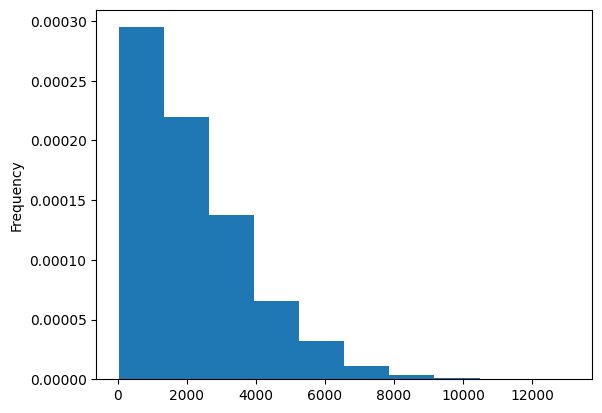

In [ ]:
train['Item_Outlet_Sales'].plot(kind='hist',density=True)

In [ ]:
current_year = datetime.datetime.now().year

In [ ]:
train["Years_of_establishment"] = current_year - train["Outlet_Establishment_Year"]

In [ ]:
train['Years_of_establishment'].head(5)

,Years_of_establishment
0,25
1,15
2,25
3,26
4,37


In [ ]:
for i in train.columns:
  if train[i].dtype=='object':
    print(i)
    print(train[i].unique())

Item_Identifier
['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
Item_Fat_Content
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Item_Type
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Outlet_Identifier
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Outlet_Size
['Medium' 'High' 'Small']
Outlet_Location_Type
['Tier 1' 'Tier 3' 'Tier 2']
Outlet_Type
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [ ]:
def remove_inconsistencies(df):
  df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'})
  return df

In [ ]:
remove_inconsistencies(train)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_of_establishment
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,25
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,15
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,25
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,26
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,37
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850,22
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,20
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,15


In [ ]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Years_of_establishment'],
      dtype='object')

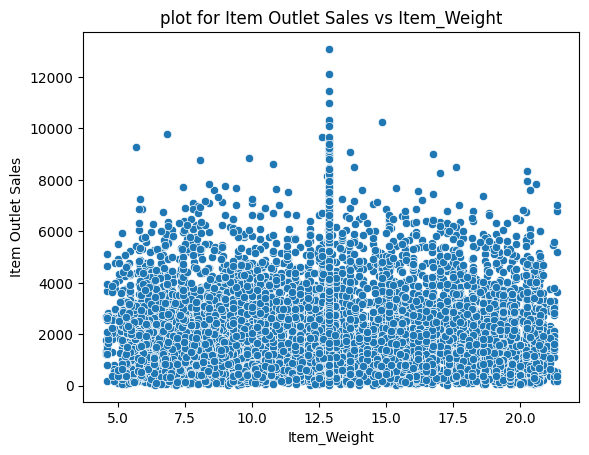

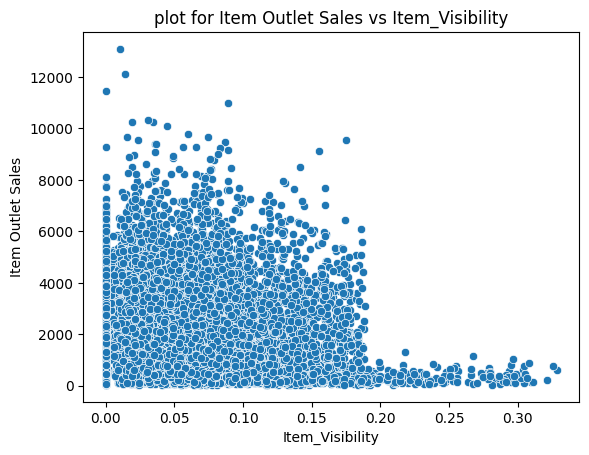

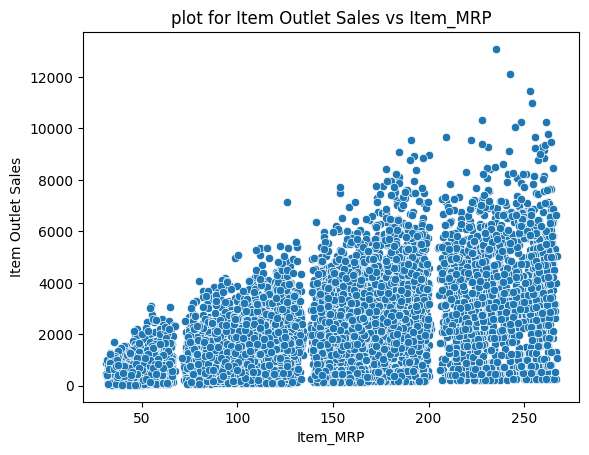

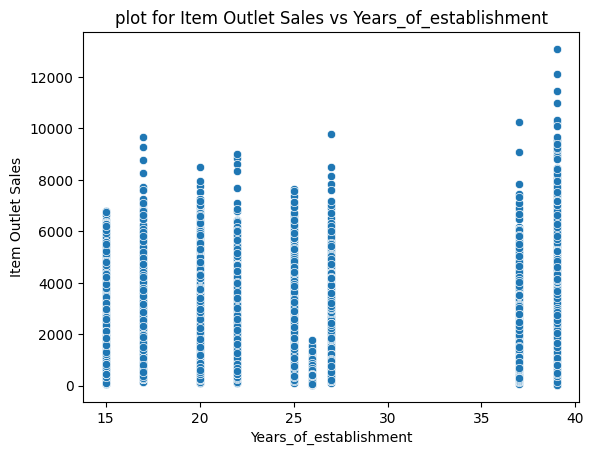

<Figure size 640x480 with 0 Axes>

In [ ]:
columns = ['Item_Weight','Item_Visibility','Item_MRP',
           'Years_of_establishment']

for i in columns:
  sns.scatterplot(x = train[i],y = train['Item_Outlet_Sales'])
  plt.title(f"plot for Item Outlet Sales vs {i}")
  plt.xlabel(i)
  plt.ylabel("Item Outlet Sales")
  plt.show()
plt.tight_layout()

In [ ]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_of_establishment
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,25
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,15
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,25
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,26
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,37


In [ ]:
def drop_columns(df):
  df = df.drop(['Item_Identifier','Outlet_Identifier','Years_of_establishment'],axis=1,inplace=True)
  return df

In [ ]:
drop_columns(train)

In [ ]:
def encode(df):
  le = LabelEncoder()
  for i in df.columns:
    if df[i].dtype=='object':
      df[i] = le.fit_transform(df[i])
  return df

In [ ]:
encode(train)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,0,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.920,1,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.500,0,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.200,1,0.000000,6,182.0950,1998,1,2,0,732.3800
4,8.930,0,0.000000,9,53.8614,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,1987,0,2,1,2778.3834
8519,8.380,1,0.046982,0,108.1570,2002,1,1,1,549.2850
8520,10.600,0,0.035186,8,85.1224,2004,2,1,1,1193.1136
8521,7.210,1,0.145221,13,103.1332,2009,1,2,2,1845.5976


<Axes: >

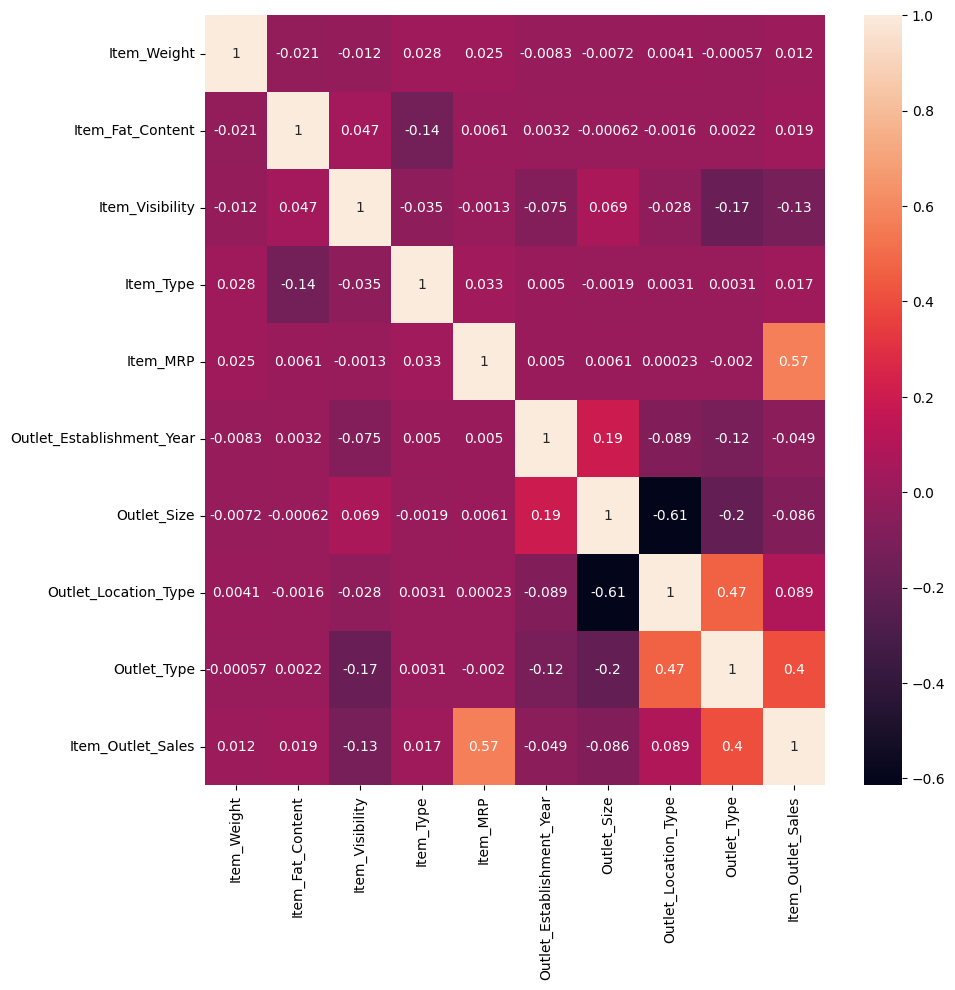

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(),annot=True)

In [ ]:
train['Item_Fat_Content'].unique()

In [ ]:
train.groupby('Item_Type')['Item_Outlet_Sales'].mean().sort_values(ascending=False)

,Item_Outlet_Sales
Item_Type,
Starchy Foods,2374.332773
Seafood,2326.065928
Fruits and Vegetables,2289.009592
Snack Foods,2277.321739
Household,2258.784300
Dairy,2232.542597
Canned,2225.194904
Breads,2204.132226
Meat,2158.977911


In [ ]:
train.groupby(['Outlet_Size','Outlet_Location_Type'])['Item_Outlet_Sales'].mean()

Outlet_Size  Outlet_Location_Type
High         Tier 3                  2298.995256
Medium       Tier 1                  2348.354635
             Tier 3                  2847.959679
Small        Tier 1                  1576.192909
             Tier 2                  2438.841866
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
train['Item_Outlet_Sales']

,Item_Outlet_Sales
0,3735.1380
1,443.4228
2,2097.2700
3,732.3800
4,994.7052
...,...
8518,2778.3834
8519,549.2850
8520,1193.1136
8521,1845.5976


In [ ]:
pd.crosstab(train.Outlet_Size,train.Outlet_Location_Type)

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Size,,,
High,0,0,932
Medium,930,0,1863
Small,1458,930,0


In [ ]:
pd.crosstab(train.Outlet_Size,train.Outlet_Type)

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,,,,
High,0,932,0,0
Medium,0,930,928,935
Small,528,1860,0,0


In [ ]:
train.groupby()

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

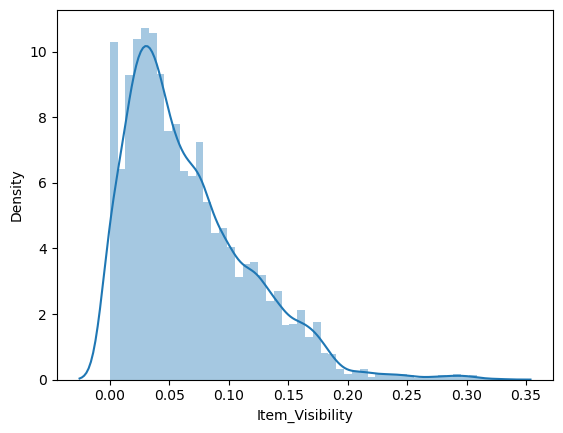

In [ ]:
sns.distplot(train.Item_Visibility,kde=True)

<AxesSubplot:xlabel='Item_Visibility'>

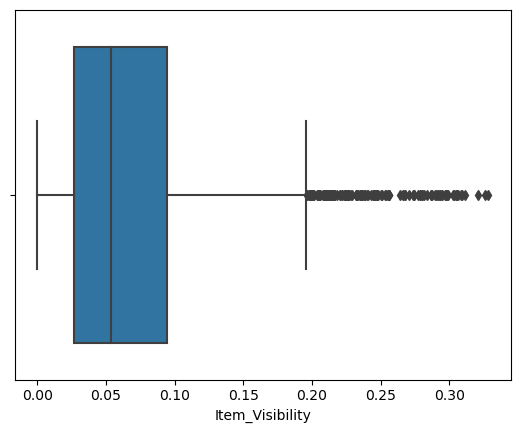

In [ ]:
sns.boxplot(train.Item_Visibility)

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

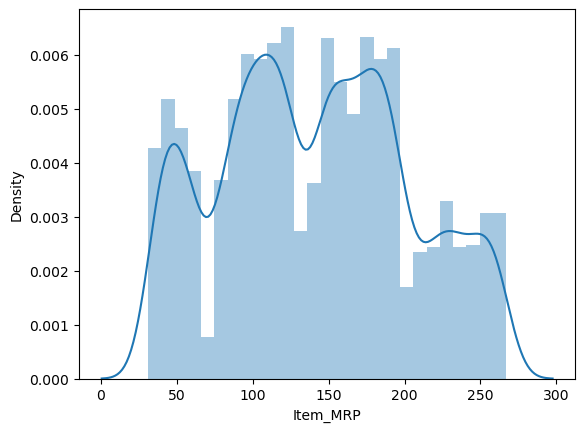

In [ ]:
 sns.distplot(train.Item_MRP,kde=True)

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Density'>

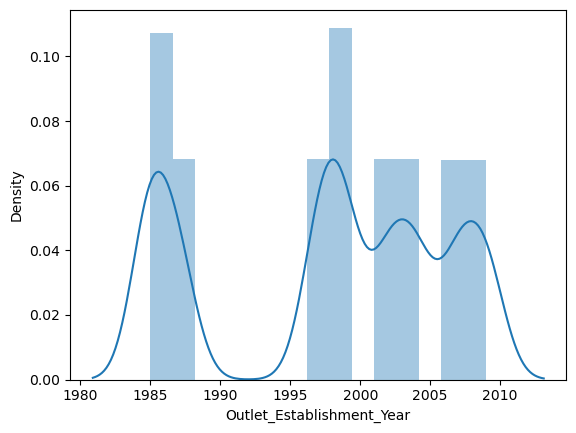

In [ ]:
sns.distplot(train['Outlet_Establishment_Year'],kde=True)

<AxesSubplot:>

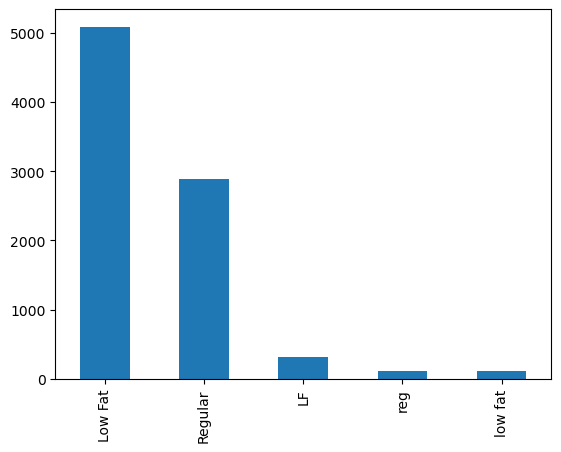

In [ ]:
# valuation of categorical variable

train.Item_Fat_Content.value_counts().plot(kind='bar')


<AxesSubplot:>

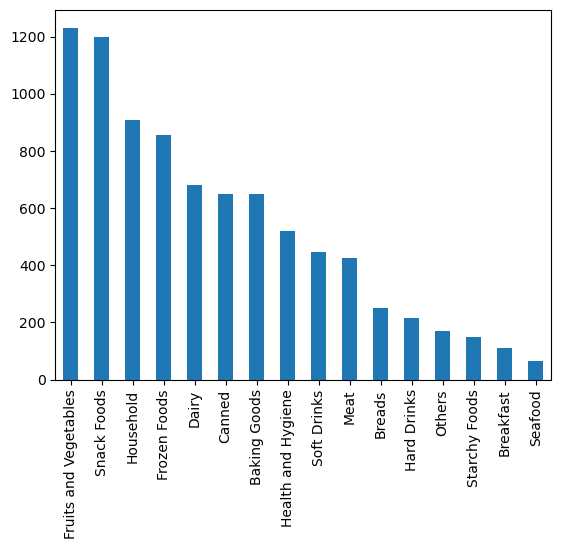

In [ ]:
train.Item_Type.value_counts().plot(kind='bar')

<AxesSubplot:>

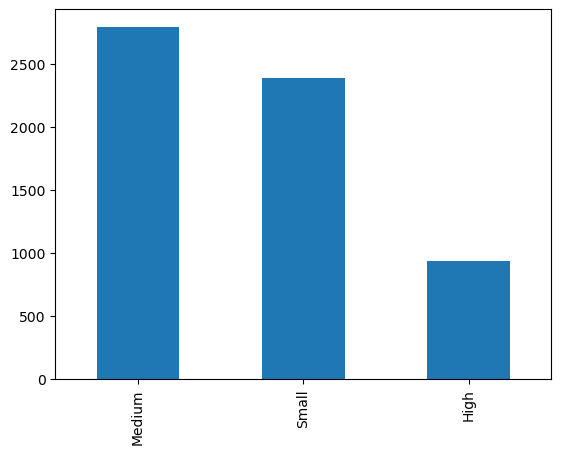

In [ ]:
train.Outlet_Size.value_counts().plot(kind='bar')

<AxesSubplot:>

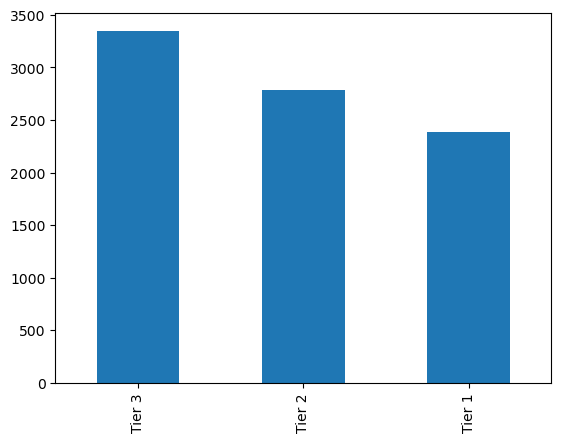

In [ ]:
train.Outlet_Location_Type.value_counts().plot(kind='bar')

<AxesSubplot:ylabel='Outlet_Location_Type'>

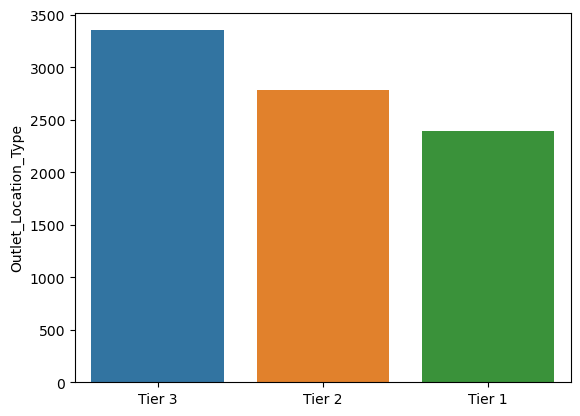

In [ ]:
sns.barplot(x=train['Outlet_Location_Type'].value_counts().index, y=train['Outlet_Location_Type'].value_counts())

In [ ]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


<AxesSubplot:ylabel='Outlet_Type'>

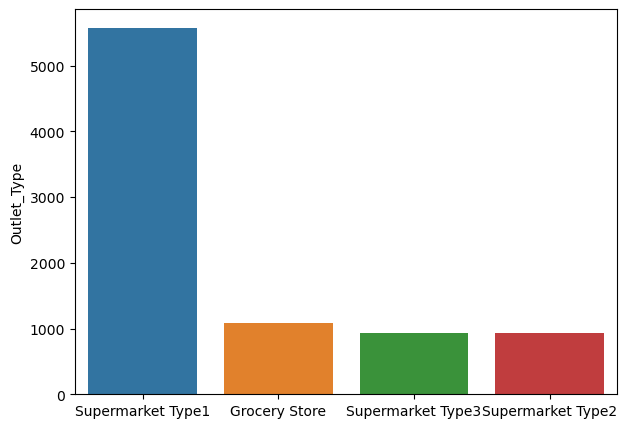

In [ ]:
plt.figure(figsize=(7,5))
sns.barplot(x=train['Outlet_Type'].value_counts().index,y=train['Outlet_Type'].value_counts())

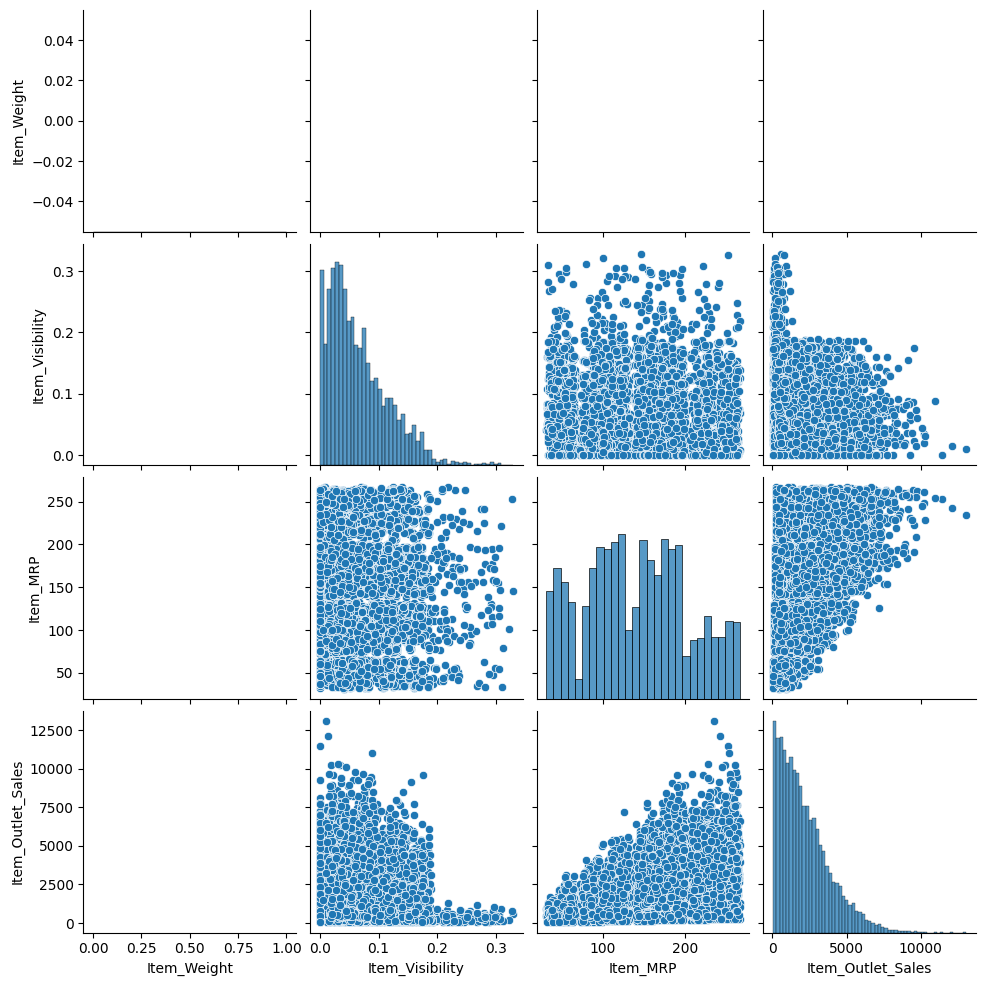

In [ ]:
sns.pairplot(train[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']])
plt.show()

<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

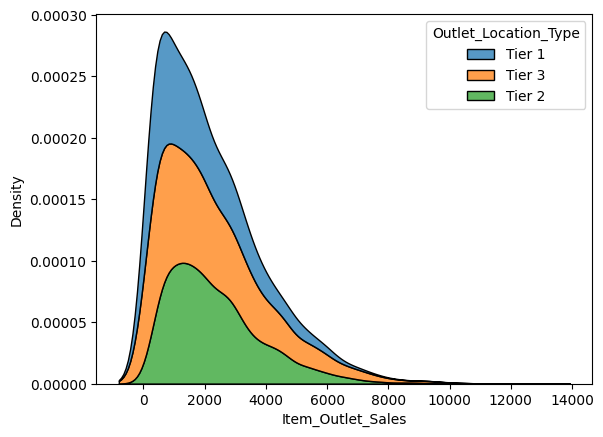

In [ ]:
sns.kdeplot(data=train, x='Item_Outlet_Sales', hue='Outlet_Location_Type', multiple='stack')
# The data argument is explicitly provided to kdeplot
# x is used to specify the column for the x-axis.

In [ ]:
data = train['Item_Visibility']

Q1 = np.percentile(data,25)
Q3 = np.percentile(data,75)
IQR = Q3-Q1

lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
outliers = (data<lower_limit)|(data>upper_limit)
print(data[outliers].count())

144


<AxesSubplot:>

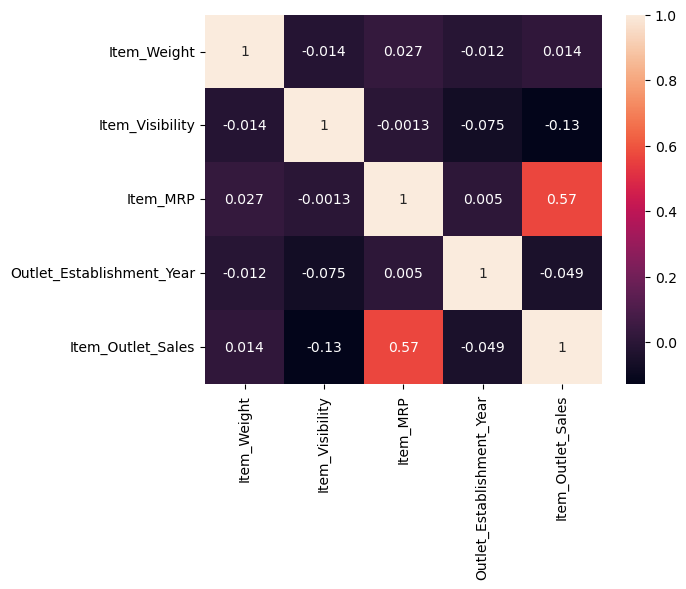

In [ ]:
numeric = train.select_dtypes(include=[np.number])
numeric = numeric.corr()
sns.heatmap(numeric,annot=True)

In [ ]:
x = train.drop('Item_Outlet_Sales',axis=1)
y = train['Item_Outlet_Sales']

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(6818, 9)
(1705, 9)
(6818,)
(1705,)


In [ ]:
rfr = RandomForestRegressor()
rfr.fit(xtrain,ytrain)

RandomForestRegressor()

In [ ]:
pd.DataFrame(rfr.feature_importances_,index=xtrain.columns,columns=['importance']).sort_values('importance',ascending=False)

,importance
Item_MRP,0.449745
Outlet_Type,0.259309
Item_Visibility,0.111929
Item_Weight,0.057044
Item_Type,0.047336
Outlet_Establishment_Year,0.043097
Outlet_Size,0.011156
Outlet_Location_Type,0.010732
Item_Fat_Content,0.009651


In [ ]:
colums = ['Item_MRP','Outlet_Type','Item_Visibility','Item_Weight','Item_Type','Outlet_Establishment_Year']

In [ ]:
x = train[colums]
y = train['Item_Outlet_Sales']

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
reg = xgboost.XGBRegressor()

In [ ]:
param_grid = {
    'learning_rate':[0.5,0.99],
    'max_depth':[1,7],
    'n_estimators':[100,200],
    'subsample':[0.5,1]
}

In [ ]:
cv_xg = RandomizedSearchCV(estimator=reg,param_distributions = param_grid,cv=5,n_jobs=-1)

In [ ]:
cv_xg.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.5, 0.99],
                                        'max_depth': [1, 7],
                                        'n_estimators': [100, 200],
                                        'subsample': [0.5, 1]})

In [ ]:
cv_xg.best_params_

{'subsample': 1, 'n_estimators': 100, 'max_depth': 1, 'learning_rate': 0.99}

In [ ]:
model = xgboost.XGBRegressor(learning_rate=0.99,max_depth=1,n_estimators=100,subsample=1)

In [ ]:
model.fit(xtrain,ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.99, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=1, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
train_pred = model.predict(xtrain)
test_pred = model.predict(xtest)

In [ ]:
def model_evaluation(actual,pred):
  mse = mean_squared_error(actual,pred)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(actual,pred)
  r2 = r2_score(actual,pred)
  print(f"MSE: {mse}")
  print(f"RMSE: {rmse}")
  print(f"MAE: {mae}")
  print(f"R2: {r2}")

In [ ]:
model_evaluation(ytrain,train_pred)

MSE: 1244368.8191436657
RMSE: 1115.5128054592944
MAE: 825.6668381359837
R2: 0.5706309141690546


In [ ]:
model_evaluation(ytest,test_pred)

MSE: 1313340.3231532604
RMSE: 1146.0106121468773
MAE: 858.4540189928049
R2: 0.5569503096604804
